In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import pandas as pd

raw_df = pd.read_csv('/content/train.tsv', sep='\t')

raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [95]:
print(df.columns)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [97]:
raw_df.Phrase.sample(10).values #exploring the phrases

array(["This is a heartfelt story ... it just is n't a very involving one",
       "its writer-director 's",
       'a powerful drama with enough sardonic wit', 'made a difference',
       "'s there", 'give herself over',
       'both the primary visual influence',
       'By its modest , straight-ahead standards', "the bard 's",
       'determined not to make them'], dtype=object)

In [53]:
test_df = pd.read_csv('/content/test.tsv', sep='\t')
test_df


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: proportion, dtype: float64


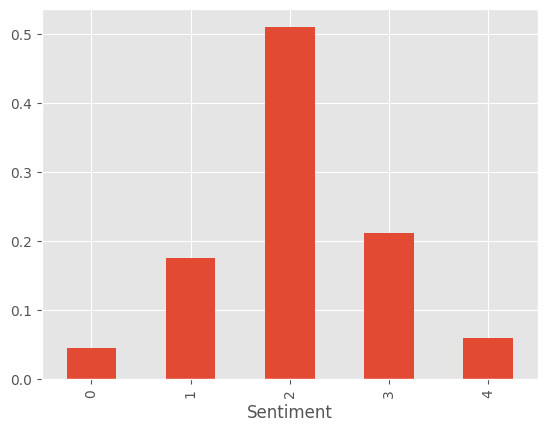

In [54]:
z=raw_df.Sentiment.value_counts(normalize=True)
z.sort_index().plot(kind='bar')
print(z)

In [55]:
from nltk.tokenize import word_tokenize


In [56]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [57]:
word_tokenize("i am (the) pure consciousness!")

['i', 'am', '(', 'the', ')', 'pure', 'consciousness', '!']

In [58]:
from nltk.stem.snowball import SnowballStemmer

In [59]:
stemmer=SnowballStemmer(language='english')

In [60]:
stemmer.stem('Running')

'run'

In [62]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

english_stopwords = stopwords.words('english')
print(", ".join(english_stopwords))


a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, v

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def tokenize(text):
    tokens = word_tokenize(text.lower())  # Lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Keep only alphabetic
    tokens = [stemmer.stem(token) for token in tokens if token not in english_stopwords]
    return tokens

In [64]:
tokenize('what do you mean, you completed ML?')


['mean', 'complet', 'ml']

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [66]:
vectorizer=TfidfVectorizer(tokenizer=tokenize,
                           ngram_range=(1,2),
                           max_features=2300)

In [67]:
vectorizer.fit(raw_df.Phrase)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_features=2300, ngram_range=(1, 2),
                tokenizer=<function tokenize at 0x7db7ed3dcfe0>)

In [68]:
len(vectorizer.vocabulary_)


2300

In [69]:
vectorizer.get_feature_names_out()[:80]


array(['abandon', 'abil', 'abl', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'academi', 'accent', 'accept', 'access',
       'accomplish', 'account', 'accur', 'ach', 'achiev', 'across', 'act',
       'action', 'action film', 'action movi', 'action sequenc', 'actor',
       'actress', 'actual', 'ad', 'adam', 'adam sandler', 'adapt', 'add',
       'addit', 'adequ', 'admir', 'admit', 'adolesc', 'adult', 'adventur',
       'affair', 'affect', 'affirm', 'afraid', 'age', 'ago', 'ahead',
       'aim', 'aimless', 'air', 'album', 'alien', 'aliv', 'allen',
       'allow', 'almost', 'almost everi', 'alon', 'along', 'alreadi',
       'also', 'altern', 'although', 'alway', 'amateurish', 'amaz',
       'ambigu', 'ambit', 'ambiti', 'america', 'american', 'ami', 'among',
       'amount', 'amus', 'analyz', 'angel', 'angl', 'angst', 'anguish',
       'anim', 'ann'], dtype=object)

In [70]:
inputs=vectorizer.transform(raw_df.Phrase)


In [71]:
inputs.shape


(156060, 2300)

In [71]:
inputs.toarray()[0:100]


In [72]:
test_df = test_df.dropna(subset=['Phrase'])  # removing empty value
test_inputs = vectorizer.transform(test_df.Phrase)

In [73]:
test_inputs.shape


(66291, 2300)

In [74]:
TRAIN_SIZE = 111000
train_inputs=inputs[:TRAIN_SIZE]
train_targets= raw_df.Sentiment[:TRAIN_SIZE]

In [75]:
train_inputs.shape ,train_targets.shape


((111000, 2300), (111000,))

In [76]:
val_inputs=inputs[TRAIN_SIZE:]
val_targets=raw_df.Sentiment[TRAIN_SIZE:]

In [77]:
val_inputs.shape , val_targets.shape


((45060, 2300), (45060,))

In [78]:
from sklearn.linear_model import LogisticRegression


In [79]:
model = LogisticRegression(max_iter=1000)
model.fit(train_inputs, train_targets)

LogisticRegression(max_iter=1000)

In [81]:
train_preds= model.predict(train_inputs)


In [80]:
train_targets


,Sentiment
0,1
1,2
2,2
3,2
4,2
...,...
110995,2
110996,0
110997,1
110998,1


In [83]:
train_preds


array([3, 2, 2, ..., 1, 1, 1])

In [84]:
from sklearn.metrics import accuracy_score


In [85]:
accuracy_score(train_targets, train_preds)


0.6390810810810811

In [86]:
val_preds=model.predict(val_inputs)


In [87]:
accuracy_score(val_targets, val_preds)


0.5775632490013316

In [88]:
small_df=raw_df.sample(10)
small_df


,PhraseId,SentenceId,Phrase,Sentiment
140018,140019,7597,film that puts the sting back into the con,2
140780,140781,7637,deserve but rarely receive it,1
5049,5050,197,you had already seen that movie,1
100284,100285,5262,makes clear that a prostitute can be as lonely...,2
72495,72496,3704,from others in the genre,2
28092,28093,1291,thumpingly hyperbolic terms,2
74399,74400,3813,Hardly a nuanced portrait of a young woman 's ...,1
97529,97530,5099,part entertainment,2
79856,79857,4114,is a welcome relief from the usual two-dimensi...,3
29768,29769,1380,spectacular performance - ahem,4


In [89]:
small_inputs=vectorizer.transform(small_df.Phrase)
small_inputs.shape

(10, 2300)

In [90]:
small_preds=model.predict(small_inputs)
small_preds

array([2, 2, 2, 2, 2, 2, 3, 3, 3, 4])

In [91]:
accuracy_score(small_preds, small_df.Sentiment)

0.6

In [92]:
test_preds= model.predict(test_inputs)

In [93]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [99]:
display(test_df)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: proportion, dtype: float64


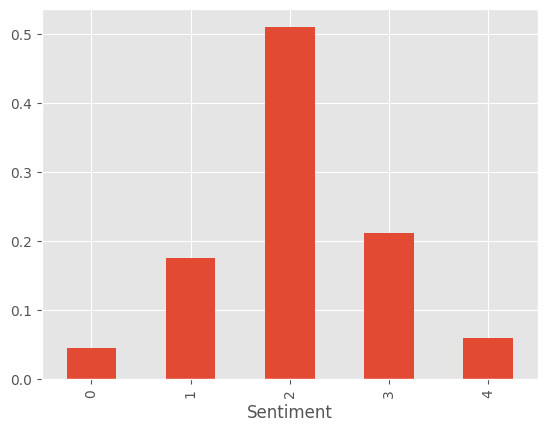

In [100]:
z=raw_df.Sentiment.value_counts(normalize=True)
z.sort_index().plot(kind='bar')
print(z)

In [101]:
from nltk.tokenize import word_tokenize

In [102]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [103]:
word_tokenize("i am (the) pure consciousness!")


['i', 'am', '(', 'the', ')', 'pure', 'consciousness', '!']

In [104]:
from nltk.stem.snowball import SnowballStemmer


In [105]:
stemmer=SnowballStemmer(language='english')


In [106]:
stemmer.stem('Running')


'run'

In [107]:
import nltk
nltk.download('stopwords')
english_stopwords= stopwords.words('english')
", ".join(english_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [108]:
def tokenize(text):
    tokens = word_tokenize(text.lower())  # Lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Keep only alphabetic
    tokens = [stemmer.stem(token) for token in tokens if token not in english_stopwords]
    return tokens

In [109]:
tokenize('what do you mean, you completed ML?')


['mean', 'complet', 'ml']

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [111]:
vectorizer=TfidfVectorizer(tokenizer=tokenize,
                           ngram_range=(1,2),
                           max_features=2300)

In [112]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_features=2300, ngram_range=(1, 2),
                tokenizer=<function tokenize at 0x7db7ec96d9e0>)

In [113]:
len(vectorizer.vocabulary_)

2300

In [114]:
vectorizer.get_feature_names_out()[:80]

array(['abandon', 'abil', 'abl', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'academi', 'accent', 'accept', 'access',
       'accomplish', 'account', 'accur', 'ach', 'achiev', 'across', 'act',
       'action', 'action film', 'action movi', 'action sequenc', 'actor',
       'actress', 'actual', 'ad', 'adam', 'adam sandler', 'adapt', 'add',
       'addit', 'adequ', 'admir', 'admit', 'adolesc', 'adult', 'adventur',
       'affair', 'affect', 'affirm', 'afraid', 'age', 'ago', 'ahead',
       'aim', 'aimless', 'air', 'album', 'alien', 'aliv', 'allen',
       'allow', 'almost', 'almost everi', 'alon', 'along', 'alreadi',
       'also', 'altern', 'although', 'alway', 'amateurish', 'amaz',
       'ambigu', 'ambit', 'ambiti', 'america', 'american', 'ami', 'among',
       'amount', 'amus', 'analyz', 'angel', 'angl', 'angst', 'anguish',
       'anim', 'ann'], dtype=object)

In [115]:
inputs=vectorizer.transform(raw_df.Phrase)


In [116]:
inputs.shape


(156060, 2300)

In [117]:
inputs.toarray()[0:100]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
test_df = test_df.dropna(subset=['Phrase'])  # removing empty value
test_inputs = vectorizer.transform(test_df.Phrase)

In [119]:
test_inputs.shape


(66291, 2300)

In [120]:
TRAIN_SIZE = 111000
train_inputs=inputs[:TRAIN_SIZE]
train_targets= raw_df.Sentiment[:TRAIN_SIZE]

In [121]:
train_inputs.shape ,train_targets.shape


((111000, 2300), (111000,))

In [122]:
val_inputs=inputs[TRAIN_SIZE:]
val_targets=raw_df.Sentiment[TRAIN_SIZE:]

In [123]:
val_inputs.shape , val_targets.shape


((45060, 2300), (45060,))

In [124]:
from sklearn.linear_model import LogisticRegression


In [125]:
model = LogisticRegression(max_iter=1000)
model.fit(train_inputs, train_targets)


LogisticRegression(max_iter=1000)

In [126]:
train_preds= model.predict(train_inputs)


In [127]:
train_targets


,Sentiment
0,1
1,2
2,2
3,2
4,2
...,...
110995,2
110996,0
110997,1
110998,1


In [128]:
train_preds


array([3, 2, 2, ..., 1, 1, 1])

In [129]:
from sklearn.metrics import accuracy_score


In [130]:
accuracy_score(train_targets, train_preds)


0.6390810810810811

In [131]:
val_preds=model.predict(val_inputs)


In [132]:
accuracy_score(val_targets, val_preds)


0.5775632490013316

In [133]:
small_df=raw_df.sample(10)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
148900,148901,8101,plastered with one Hollywood cliche,1
71109,71110,3628,is a small gem,3
133958,133959,7229,The narrator and the other characters try to c...,1
67678,67679,3436,undeniably fascinating and playful fellow,4
14604,14605,629,mostly due,2
125593,125594,6747,Collateral Damage offers formula payback and t...,2
108715,108716,5754,by David Hennings,2
15267,15268,655,Joel Silver and Robert Zemeckis,2
9960,9961,418,walked away from this new version of E.T. just...,3
19822,19823,875,An edgy thriller,4


In [134]:
small_inputs=vectorizer.transform(small_df.Phrase)
small_inputs.shape

(10, 2300)

In [135]:
small_preds=model.predict(small_inputs)
small_preds

array([1, 3, 2, 3, 2, 2, 2, 2, 2, 2])

In [136]:
accuracy_score(small_preds, small_df.Sentiment)

0.6

In [137]:
test_preds= model.predict(test_inputs)


In [138]:
test_preds


array([3, 3, 2, ..., 2, 2, 1])

In [139]:
sub_df


NameError: name 'sub_df' is not defined

In [140]:
display(test_df)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [145]:
sub_df = pd.DataFrame({'PhraseId': test_df['PhraseId'], 'Sentiment': test_preds})
display(sub_df.head())

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3


In [144]:
sub_df


,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [146]:
sub_df.to_csv('submission.csv',index=None)
